In [32]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from collections import Counter
from math import sqrt
import matplotlib.pyplot as plt

In [33]:
df = pd.read_csv("diabetes.csv")

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<Figure size 1200x600 with 0 Axes>

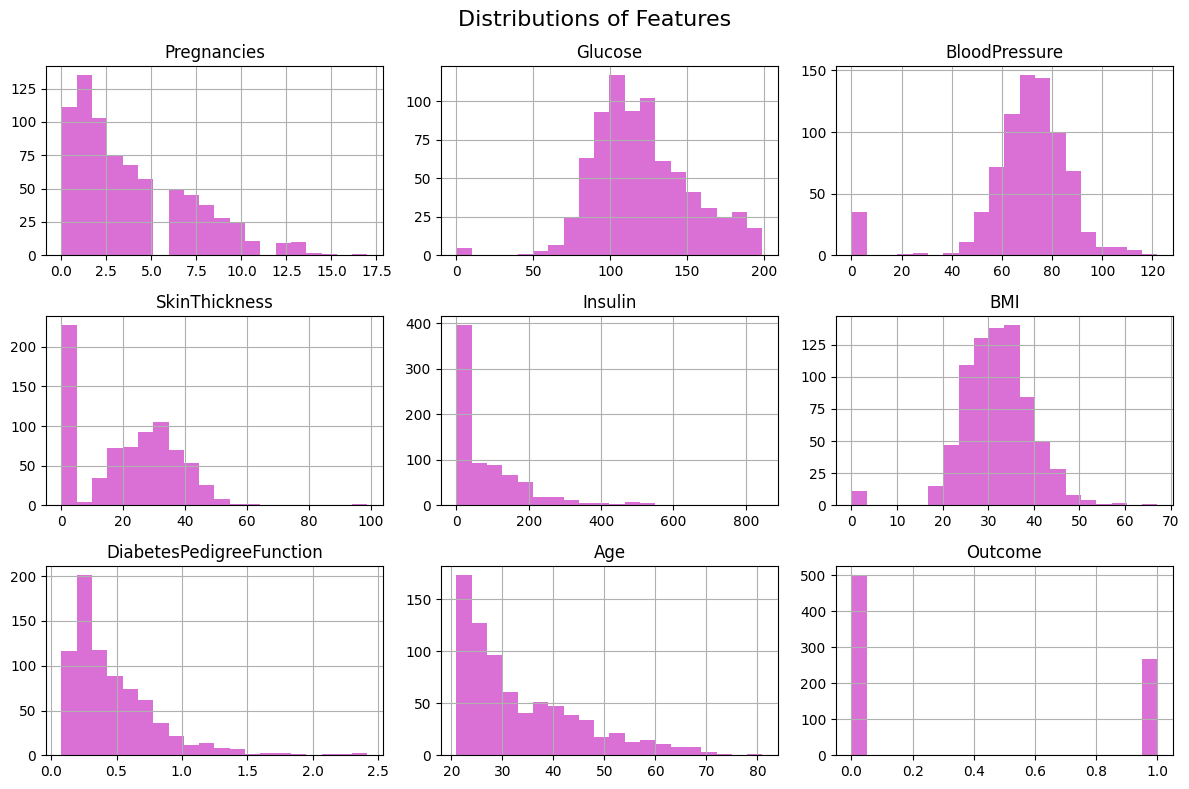

In [34]:
plt.figure(figsize=(12, 6))
df.hist(bins=20, figsize=(12, 8), color='orchid')
plt.suptitle('Distributions of Features', fontsize=16)
plt.tight_layout()
plt.show()

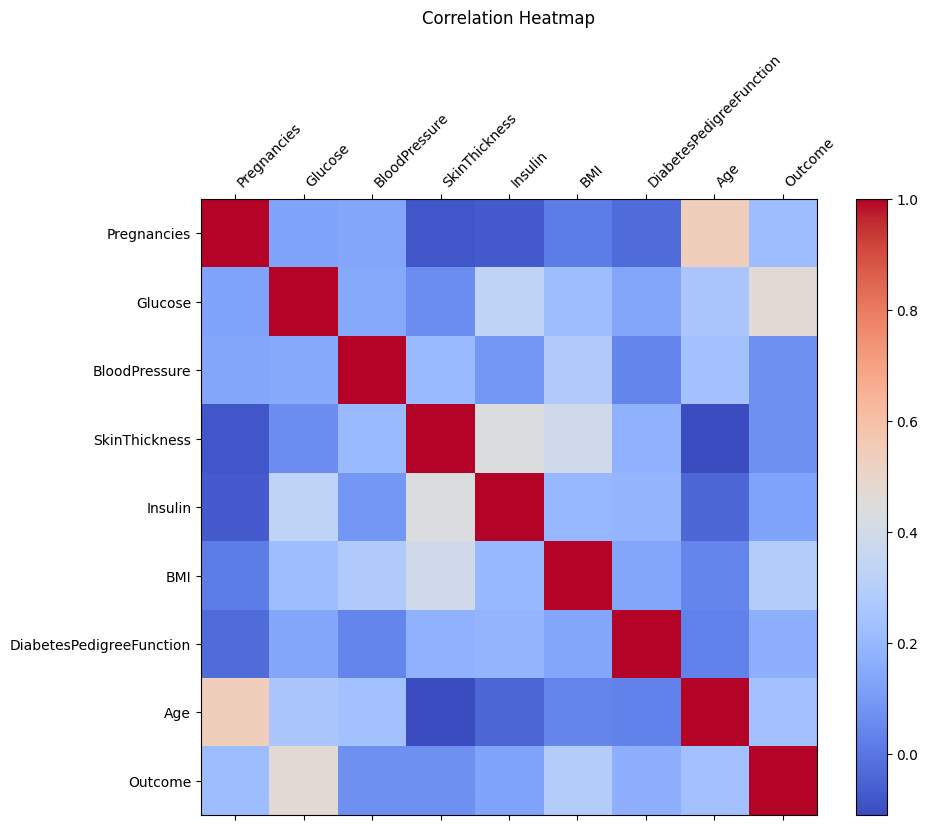

In [35]:
correlation = df.corr().round(2)
fig, ax = plt.subplots(figsize=(10, 8))
cax = ax.matshow(correlation, cmap='coolwarm')
fig.colorbar(cax)

ticks = np.arange(len(correlation.columns))
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(correlation.columns, rotation=45, ha='left')
ax.set_yticklabels(correlation.columns)
plt.title("Correlation Heatmap", pad=20)
plt.show()

In [36]:
cols_with_zeroes = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
for col in cols_with_zeroes:
    df[col] = df[col].replace(0, np.nan)
    df[col] = df[col].fillna(df[col].median())

scaler = MinMaxScaler()
X = scaler.fit_transform(df.drop("Outcome", axis=1))
y = df["Outcome"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
def euclidean(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

def manhattan(x1, x2):
    return np.sum(np.abs(x1 - x2))

def minkowski(x1, x2, p=3):
    return np.sum(np.abs(x1 - x2) ** p) ** (1 / p)

In [38]:
class KNN:
    def __init__(self, k=3, distance_metric='euclidean'):
        self.k = k
        self.distance_metric = distance_metric

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def _distance(self, x1, x2):
        if self.distance_metric == 'euclidean':
            return euclidean(x1, x2)
        elif self.distance_metric == 'manhattan':
            return manhattan(x1, x2)
        elif self.distance_metric == 'minkowski':
            return minkowski(x1, x2, p=3)
        else:
            raise ValueError("Unsupported distance metric")

    def predict(self, X):
        return [self._predict(x) for x in X]

    def _predict(self, x):
        distances = [self._distance(x, x_train) for x_train in self.X_train]
        k_indices = np.argsort(distances)[:self.k]
        k_labels = [self.y_train[i] for i in k_indices]
        return Counter(k_labels).most_common(1)[0][0]

    def score(self, X, y):
        preds = self.predict(X)
        return np.mean(preds == y)

In [39]:
results = []

for metric in ['euclidean', 'manhattan', 'minkowski']:
    for k in range(1, 21):
        model = KNN(k=k, distance_metric=metric)
        model.fit(X_train, y_train)
        acc = model.score(X_test, y_test)
        results.append((k, metric, acc))

top = sorted(results, key=lambda x: x[2], reverse=True)[:5]
for k, metric, acc in top:
    print(f"k = {k}, metric = {metric}, accuracy = {acc:.4f}")

k = 17, metric = euclidean, accuracy = 0.7727
k = 19, metric = euclidean, accuracy = 0.7727
k = 15, metric = euclidean, accuracy = 0.7662
k = 8, metric = manhattan, accuracy = 0.7662
k = 15, metric = manhattan, accuracy = 0.7662
